In [1]:
import os
import pathlib
import skrf as rf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Setup Parameters
touchstone_file = "/scratch/04703/sravula/UTAFSDataNew/case00/case00.s2p"
n_poles = 250

In [3]:
# Convert a vector fit model to a Network
def _fill_fitted_network(name, original_network, vector_fit):
    # There may be a smarter way to do this, but I haven't found it.
    n_ports = original_network.s.shape[1]
    frequencies = original_network.f
    s = np.zeros((len(frequencies), n_ports, n_ports), dtype=complex)
    for p1 in range(n_ports):
        for p2 in range(n_ports):
            s[:,p1, p2] = vector_fit.get_model_response(p1, p2, frequencies)
    return rf.Network(name=name, frequency=rf.Frequency.from_f(frequencies, unit="Hz"), s=s)

In [4]:
def _plot_single_port(row, col, network):
    # Extract a single port response
    frequencies = network.f
    port_entry = [network.s[ff,row, col] for ff in range(len(frequencies))]
    plt.plot(frequencies, [abs(val) for val in port_entry])
    
    plt.title(f"$|S_{{{row+1}{col+1}}}|$")
    plt.xlabel("Frequency")
    plt.ylabel("$|S|$")

In [5]:
print("\n\n" + "#"*50 + "\n" + f"Loading {touchstone_file}")
original_network = rf.Network(touchstone_file)



##################################################
Loading /scratch/04703/sravula/UTAFSDataNew/case00/case00.s2p


In [6]:
print("\n\n" + "#"*50 + "\n" + f"Fitting vector with {n_poles} complex poles.")
vf = rf.VectorFitting(original_network)
vf.vector_fit(n_poles_cmplx=n_poles)



##################################################
Fitting vector with 250 complex poles.


/scratch/04703/sravula/conda_local/envs/devito-base/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Vector Fitting: The pole relocation process stopped after reaching the maximum number of iterations (N_max = 100). The results did not converge properly. Hint: the linear system was ill-conditioned (max. condition number = 5553978815536351.0). This often means that more poles are required.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
print("\n\n" + "#"*50 + "\n" + f"Extracting network from vector fit model.")
fitted_network = _fill_fitted_network(f"VF{n_poles}", original_network, vf)



##################################################
Extracting network from vector fit model.


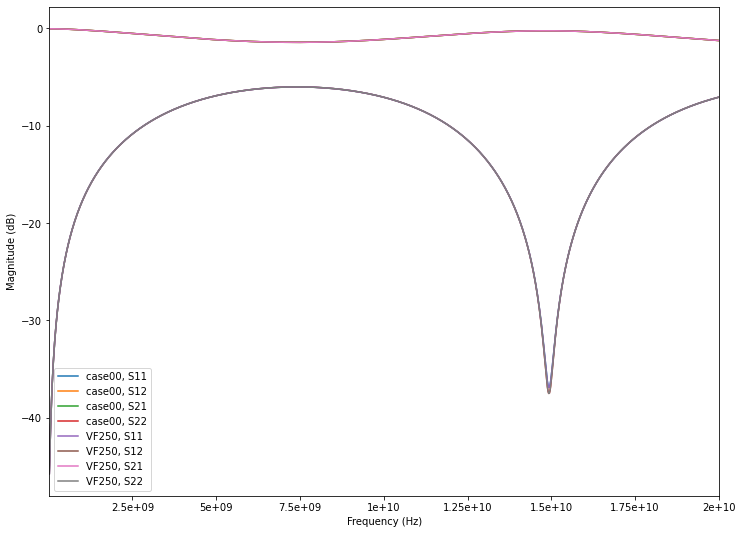

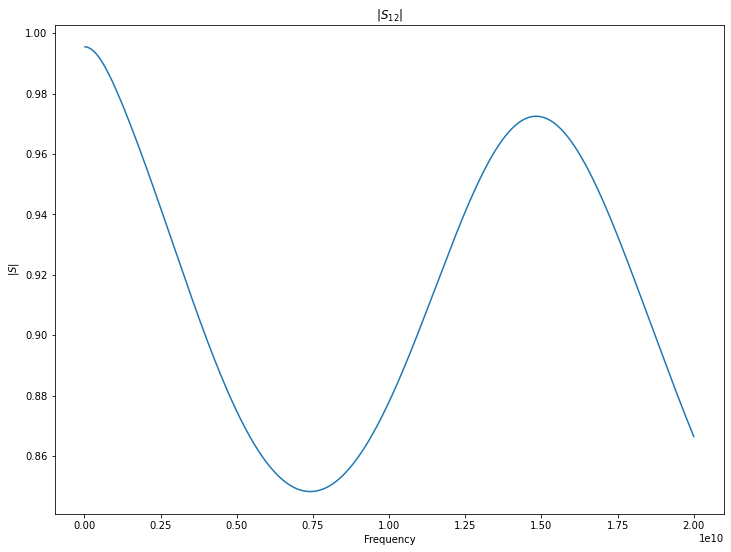

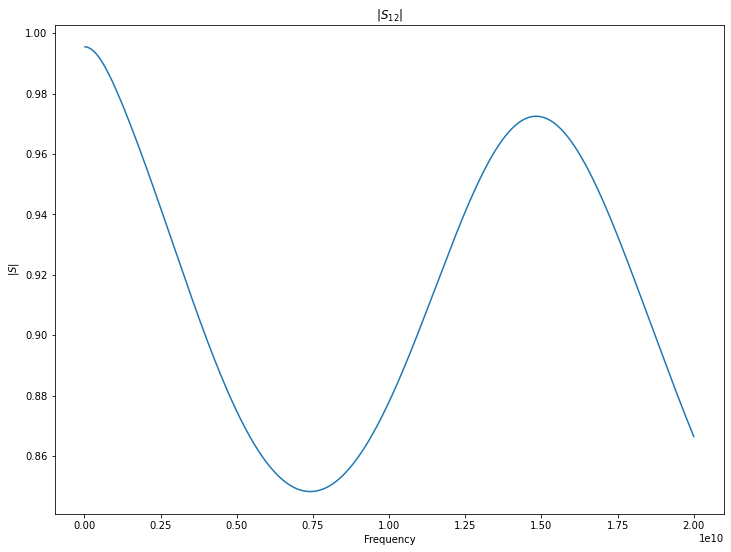

In [8]:
figsize=(12,9)

plt.figure(1, figsize=figsize)
original_network.plot_s_db()
fitted_network.plot_s_db()
# You can also plot the S parameters directly from the vector fit.
# vf.plot_s_db()

plt.figure(2, figsize=figsize)
_plot_single_port(0, 1, original_network)
plt.figure(3, figsize=figsize)
_plot_single_port(0, 1, fitted_network)

plt.show()

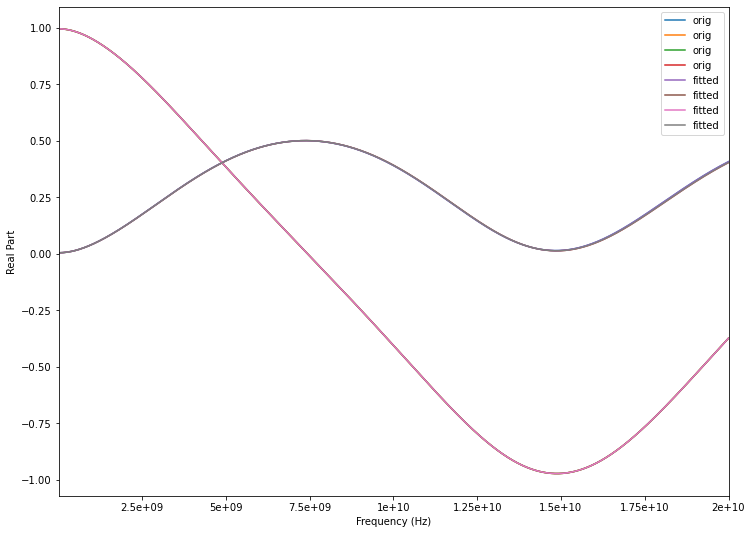

In [9]:
figsize=(12,9)

plt.figure(1, figsize=figsize)
original_network.plot_s_re(label="orig")
fitted_network.plot_s_re(label="fitted")
plt.legend()
plt.show()

In [10]:
len(fitted_network.f)

1000

In [11]:
len(original_network.f)

1000

In [12]:
print(original_network.s.shape)

(1000, 2, 2)


In [13]:
print(fitted_network.s.shape)

(1000, 2, 2)


In [14]:
print(fitted_network.s[0])

[[0.00442801+0.00267546j 0.99549937-0.00510126j]
 [0.99549937-0.00510126j 0.00442722+0.00267154j]]


In [15]:
print(original_network.s[0])
print(original_network.z[0])
print(original_network.y[0])
print(original_network.a[0])
print(original_network.t[0])

[[0.00442801+0.00267546j 0.99549937-0.00510126j]
 [0.99549937-0.00510126j 0.00442722+0.00267154j]]
[[594.00707213-20576.37494176j 593.74293025-20576.56430606j]
 [593.74293025-20576.56430606j 593.92567095-20576.36144386j]]
[[ 1.26400035-1.10939827j -1.26400232+1.10942049j]
 [-1.26400232+1.10942049j  1.26400569-1.10939416j]]
[[9.99991175e-01+1.30916777e-05j 4.46878312e-01+3.92227094e-01j]
 [1.40117143e-06+4.85585470e-05j 9.99990405e-01+9.15786764e-06j]]
[[ 0.99548698-0.00512511j  0.00443414+0.00271027j]
 [-0.00443337-0.00270634j  1.0044946 +0.00514736j]]


In [16]:
s1 = fitted_network.s[:, 1, 0].flatten()
print(s1.shape)

(1000,)


In [17]:
s1_re, s1_im = np.real(s1), np.imag(s1)

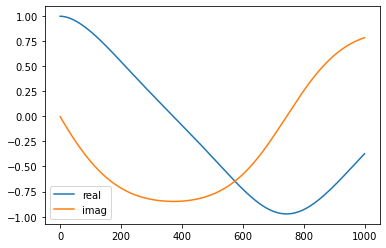

In [18]:
plt.figure()
plt.plot(s1_re, label="real")
plt.plot(s1_im, label="imag")
plt.legend()
plt.show()